In [186]:
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from citipy import citipy
# from api_keys import weather_api_key
# from api_keys import g_key
import time as time
#import wget as wget
%matplotlib notebook
import seaborn as sns

In [187]:
file_to_load = 'COVID-19-time-series-clean-complete.csv'
covid_19 = pd.read_csv(file_to_load)
confirmed_19_df = pd.DataFrame(covid_19)
del confirmed_19_df["Unnamed: 0"]
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [188]:
confirmed_19_df.dtypes

Date               object
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
New cases           int64
New deaths          int64
New recovered       int64
dtype: object

In [189]:
# Date from sting to datetime
confirmed_19_df['Date'] = pd.to_datetime(confirmed_19_df['Date'])
confirmed_19_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
89657,2021-05-02,Vietnam,2962,35,2549.0,378.0,20,0,1
89658,2021-05-02,West Bank and Gaza,297638,3272,275392.0,18974.0,1176,23,3059
89659,2021-05-02,Yemen,6341,1233,2875.0,2233.0,16,4,81
89660,2021-05-02,Zambia,91693,1253,90082.0,358.0,23,2,70


In [190]:
confirmed_19_df_by_date_conf = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_conf = confirmed_19_df_by_date_conf.drop(["Deaths", "Recovered", "Active", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_conf 

,Confirmed
Date,
2020-01-22,557
2020-01-23,655
2020-01-24,941
2020-01-25,1433
2020-01-26,2118
...,...
2021-04-28,149622851
2021-04-29,150520453
2021-04-30,151399467


In [191]:
confirmed_19_df_by_date_active = confirmed_19_df.groupby(confirmed_19_df['Date']).sum()
confirmed_19_df_by_date_active = confirmed_19_df_by_date_active.drop(["Deaths", "Recovered", "New cases", "New deaths", "New recovered"], axis=1)
confirmed_19_df_by_date_active 

,Confirmed,Active
Date,,
2020-01-22,557,510.0
2020-01-23,655,605.0
2020-01-24,941,876.0
2020-01-25,1433,1349.0
2020-01-26,2118,2006.0
...,...,...
2021-04-28,149622851,60821214.0
2021-04-29,150520453,61006193.0
2021-04-30,151399467,61194055.0


<IPython.core.display.Javascript object>


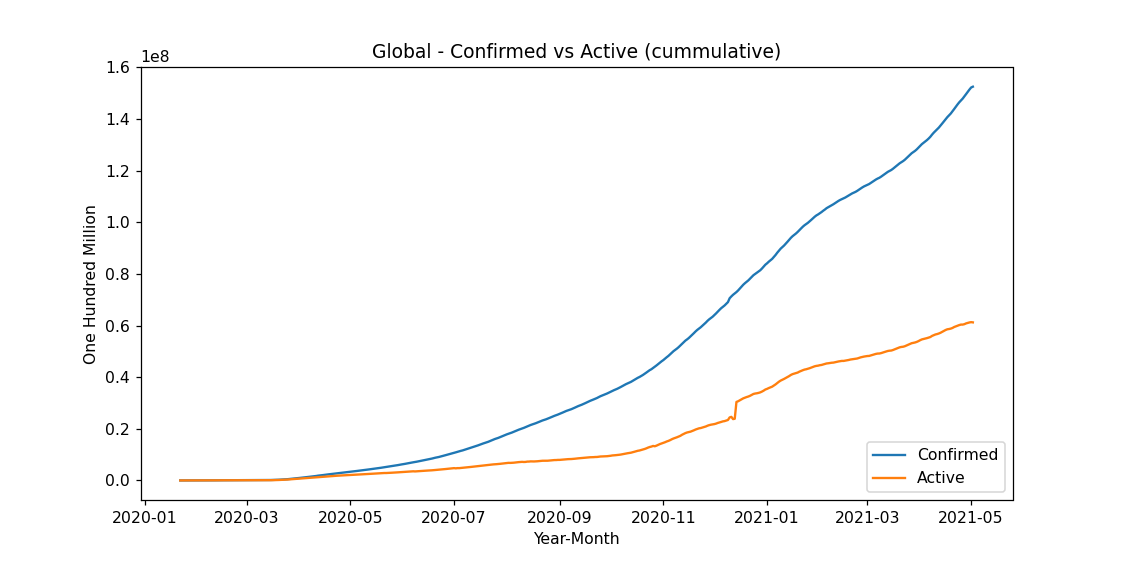

In [197]:
plt.figure(figsize=(10,5))
# y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
# x_axis = confirmed_19_df_by_date_active.index.tolist()
# plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("One Hundred Million")
plt.title("Global - Confirmed vs Active (cummulative)")
plt.plot(confirmed_19_df_by_date_active)
plt.legend(["Confirmed", "Active"], loc = "lower right")
plt.show()

In [193]:
plt.savefig("global_confirmed_and_active_cummulative.png")

<IPython.core.display.Javascript object>


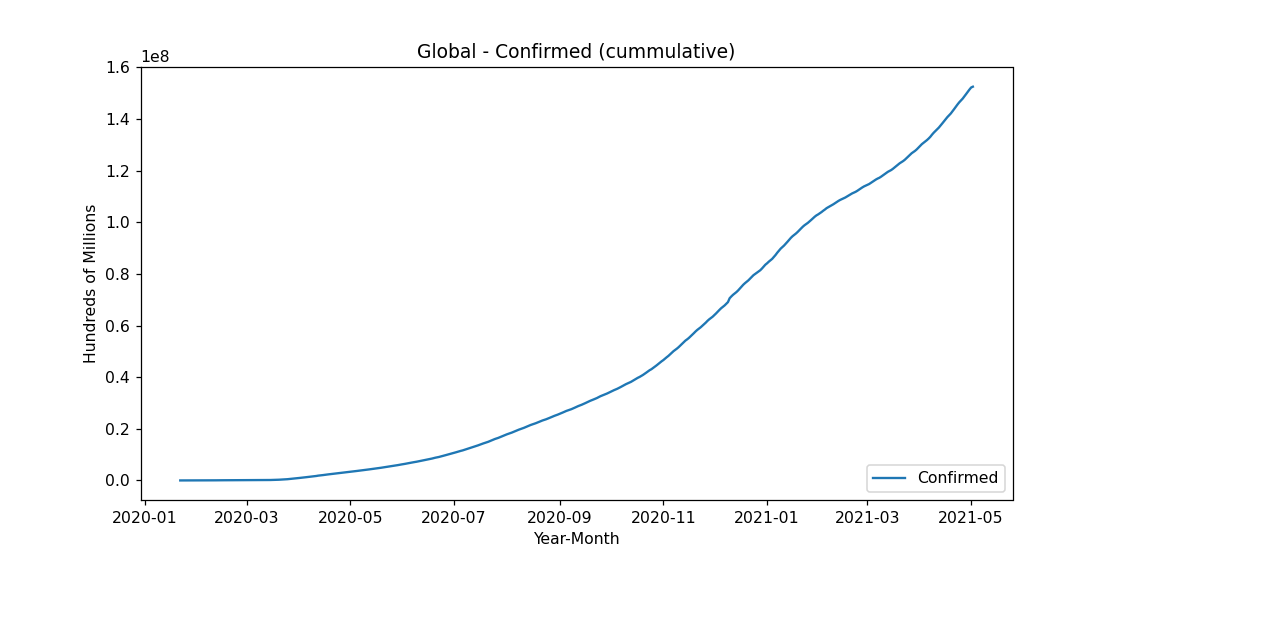

In [196]:
plt.figure(figsize=(10,5))
y_axis = confirmed_19_df_by_date_active["Confirmed"].tolist()
x_axis = confirmed_19_df_by_date_active.index.tolist()
plt.plot(x_axis, y_axis)
plt.xlabel("Year-Month")
plt.ylabel("Hundreds of Millions")
plt.title("Global - Confirmed (cummulative)")
# plt.plot(confirmed_19_df_by_date_active)
plt.legend(["Confirmed"], loc = "lower right")
plt.show()

In [195]:
plt.savefig("global_confirmed_cummulative.png")